In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d
import folium
import requests

# Soal 1: Bikin 3D barplot dari data BPS

In [216]:
df = pd.read_excel('indo_12_1.xls', header=3, index_col=0, skipfooter=3, na_values='-')
df

,1971,1980,1990,1995,2000,2010
Aceh,2008595.0,2611271.0,3416156.0,3847583.0,3930905.0,4494410
Sumatera Utara,6621831.0,8360894.0,10256027.0,11114667.0,11649655.0,12982204
Sumatera Barat,2793196.0,3406816.0,4000207.0,4323170.0,4248931.0,4846909
Riau,1641545.0,2168535.0,3303976.0,3900534.0,4957627.0,5538367
Jambi,1006084.0,1445994.0,2020568.0,2369959.0,2413846.0,3092265
Sumatera Selatan,3440573.0,4629801.0,6313074.0,7207545.0,6899675.0,7450394
Bengkulu,519316.0,768064.0,1179122.0,1409117.0,1567432.0,1715518
Lampung,2777008.0,4624785.0,6017573.0,6657759.0,6741439.0,7608405
Kepulauan Bangka Belitung,NaN,NaN,NaN,NaN,900197.0,1223296
Kepulauan Riau,NaN,NaN,NaN,NaN,NaN,1679163


In [217]:
np.arange(len(list(df)))

array([0, 1, 2, 3, 4, 5])

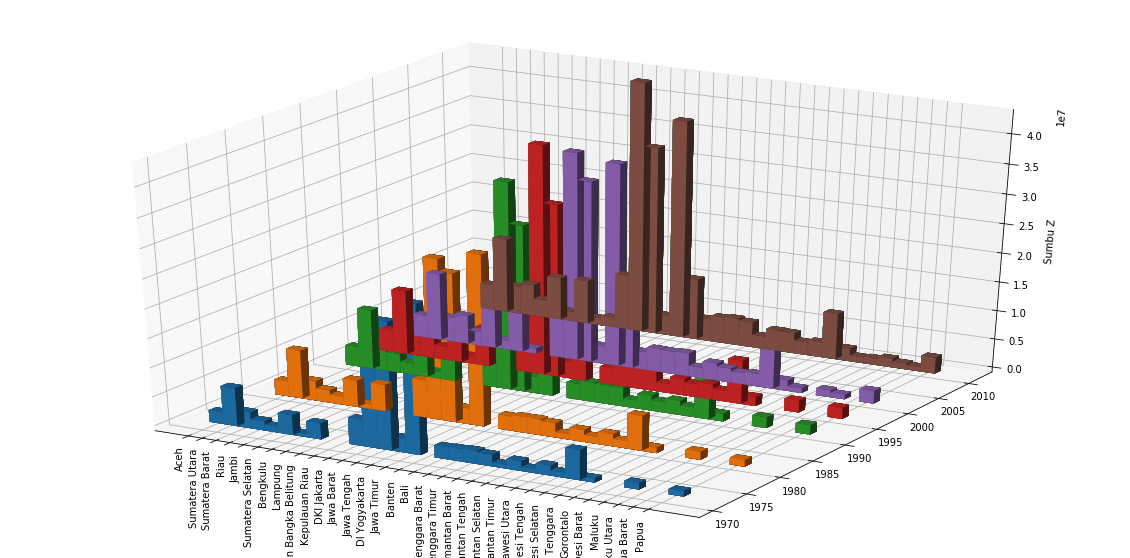

In [218]:
fig = plt.figure(figsize=[20,10])
p = plt.subplot(111, projection='3d')

for j in df:
    for i in df:
        x = np.arange(len(df[i]))
        y = i
        z = np.zeros(len(df[i]))
        dx = np.ones(len(df[i]))
        dy = np.ones(len(df[i]))
        dz = df[i]
        p.bar3d(x, y, z, dx, dy, dz)


plt.xticks(np.arange(len(df.index)), df.index, rotation=90)

p.set_zlabel('Sumbu Z')
plt.show()

# Soal 2
<pre>
    - data: https://www.kaggle.com/kveykva/sf-bay-area-pokemon-go-spawns
    - ambil 1000 data pertama dari pokemon
    - plot di folium map
    - munculkan tooltip (ketika dihover) = gambar pokemon dari api pokeapi
    - warna marknya sesuai dengan kategori pokemon
</pre>

In [219]:
df = pd.read_csv('pokemon-spawns.csv')
df

,s2_id,s2_token,num,name,lat,lng,encounter_ms,disppear_ms
0,-9185794522947256000,8085808cc6d,13,Weedle,37.793592,-122.408721,1469520187732,1469519919988
1,-9185794529389707000,8085808b51d,16,Pidgey,37.794746,-122.406420,1469520297172,1469519919992
2,-9185794529389707000,8085808b271,41,Zubat,37.794999,-122.404384,1469520709924,1469519919991
3,-9185794082713108000,808580f3587,16,Pidgey,37.795644,-122.407128,-1,1469519920134
4,-9185794076270658000,808580f4b1d,60,Poliwag,37.795592,-122.406331,1469520741876,1469519920153
...,...,...,...,...,...,...,...,...
314100,-9185787356794323000,8085871158f,84,Doduo,37.778626,-122.475958,1469670899836,1469670453557
314101,-9185786935887528000,80858773019,56,Mankey,37.769260,-122.483652,1469671114084,1469670453557
314102,-9185786940182495000,80858772545,29,Nidoran (f),37.768922,-122.483298,1469670572436,1469670453557
314103,-9185787373974192000,8085870d1db,10,Caterpie,37.773062,-122.483387,1469671257676,1469670453556


In [220]:
len(df.index)

314105

In [ ]:
tipe = data.json()['types'][0]['type']['name']
    if tipe == 'normal':
        warna = 'lightgray'
    elif tipe == 'flying':
        warna = 'gray'
    elif tipe == 'poison':
        warna = 'green'
    elif tipe == 'ground':
        warna = 'purple'
    elif tipe == 'flying':
        warna = 'gray'
    elif tipe == 'fire':
        warna = 'red'
    elif tipe == 'water':
        warna = 'blue'
    elif tipe == 'grass':
        warna = 'lightgreen'
    elif tipe == 'flying':
        warna = 'gray'
    elif tipe == 'water':
        warna = 'blue'
    elif tipe == 'ice':
        warna = 'lightblue'
    else:
        warna = 'black'

In [233]:
map = folium.Map(
location = [37.7935915752623, -122.40872063318301],
)

for i in range(1000):
    num = df.iloc[i]['num']
    url = f'https://pokeapi.co/api/v2/pokemon/{num}'
    data = requests.get(url)
    nomor = data.json()['sprites']['front_default']
    
    folium.Marker(
    location = [df.iloc[i]['lat'], df.iloc[i]['lng']],
    tooltip = f'<img width="100px" src={nomor}>',
    popup = '<b>MONAS</b><br><small>Jakarta</small>',
    icon = folium.Icon(
        color= 'orange',
        prefix='fa',
        icon='optin-monster')
).add_to(map)

map